In [8]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier



In [15]:

iris = load_iris()
X = iris.data
y = iris.target




In [16]:



clf = DecisionTreeClassifier().fit(X, y)

plot_colors = "ryb"
plot_step = 0.02 
pairs = combinations(range(X.shape[1]), 2)

plt.figure(figsize=(10, 8)) 




<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

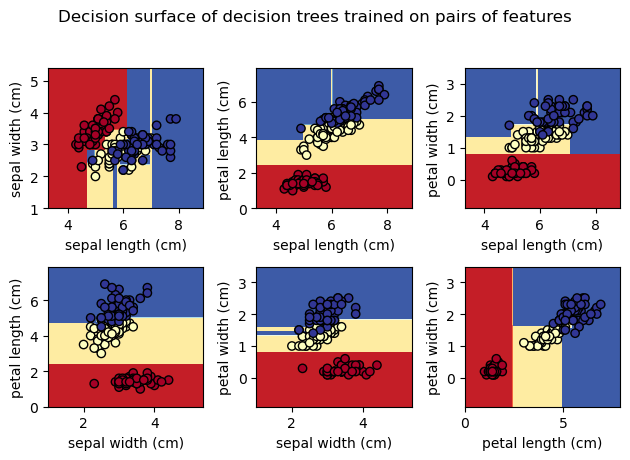

In [17]:
for i, (pair_1, pair_2) in enumerate(pairs):
    X_pair = X[:, [pair_1, pair_2]]
    clf.fit(X_pair, y)

    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 3, i + 1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plt.scatter(X_pair[:, 0], X_pair[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.xlabel(iris.feature_names[pair_1])
    plt.ylabel(iris.feature_names[pair_2])
plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

